In [5]:
import numpy as np
from scipy.special import comb
from scipy.stats import ttest_rel
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from math import floor
import json

In [6]:
plt.rcParams['font.sans-serif'] = 'Times New Roman'

In [7]:
dires = [(-1, 0), (-1, -1), (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1)]
dires = [np.array(x) for x in dires]

def dfs_length(mp, p):
    mp[p[0]][p[1]] = 255
    
    length = 0
    
    for dire in dires:
        new_p = p + dire
        if new_p[0] >= 0 and new_p[0] < mp.shape[0] and new_p[1] >= 0 and new_p[1] < mp.shape[1] and mp[new_p[0]][new_p[1]] == 0:
            length += np.linalg.norm(dire)
            length += dfs_length(mp, new_p)
    
    return length

def calc_length(mp, sig):
    mp = mp.copy()
    length = 0
    for i in range(sig.shape[0]):
        if mp[sig[i][0]][sig[i][1]] == 0:
            length += dfs_length(mp, (sig[i][0], sig[i][1]))
    return length

def calc_area(mp):
    cnt_y, cnt_x = np.nonzero(255 - im)
    return len(cnt_y)

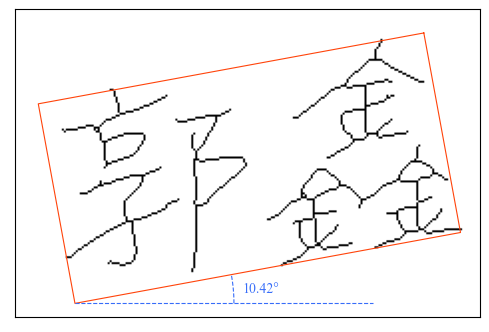

Rect:
Angle 10.416027385212043°
Perimeter 598.7327880859375
Area 20140.724609375

Signature:
Length 1194.0996385116118 Relatively 1.9943782306109816
Area 1033 Relatively 0.05128911794559589


In [16]:
im = cv2.imread('./skel/4/13.png', cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(6,5))

cnt_y, cnt_x = np.nonzero(255 - im)
cnt = np.dstack((cnt_y, cnt_x)).squeeze()
rect = cv2.minAreaRect(np.array(cnt))
box = cv2.boxPoints(rect)

plt.imshow(im, cmap="gray")
plt.plot([box[0][1], box[1][1], box[2][1], box[3][1], box[0][1]], [box[0][0], box[1][0], box[2][0], box[3][0], box[0][0]], c='#FF440B', linewidth=0.8)
plt.ylim((224, 0))
box_y = box[:, 0]
box_x = box[:, 1]

d0 = np.linalg.norm(box[0] - box[1])
d1 = np.linalg.norm(box[1] - box[2])

if d0 < d1:
    slope = -(box[1][0] - box[2][0]) / (box[1][1] - box[2][1])
else:
    slope = -(box[1][0] - box[0][0]) / (box[1][1] - box[0][1])

lowest = box.argmax(axis=0)[0]
plt.plot([box[lowest][1], box[lowest][1] + 150], [box[lowest][0], box[lowest][0]], '--', c='#376DF9', linewidth=0.8)

rct_ang = np.arctan(slope)
circle_t = np.linspace(0, -rct_ang, 100)
circle_r = 80
circle_x = circle_r * np.cos(circle_t) + box[lowest][1]
circle_y = circle_r * np.sin(circle_t) + box[lowest][0]
plt.plot(circle_x, circle_y, '--', c = '#376DF9',  linewidth=0.8)
rct_ang = rct_ang*180/np.pi
plt.text(box[lowest][1] + 84, box[lowest][0]- 5.5, f'{round(rct_ang, 2)}°', c = '#376DF9')
plt.xlim((-10, 224))
plt.ylim((190, 35))
plt.xticks([])
plt.yticks([])

plt.show()
fig.savefig('rect-1.pdf', bbox_inches='tight',pad_inches=0.05)

print('Rect:')
rct_peri = 2 * (d0 + d1)
rct_a =  d0 * d1
print(f'Angle {rct_ang}°')
print(f'Perimeter {rct_peri}')
print(f'Area {rct_a}\n')

print('Signature:')
area = calc_area(im)
length = calc_length(im, cnt)
print(f'Length {length} Relatively {length / rct_peri}')
print(f'Area {area} Relatively {area / rct_a}')

In [7]:
(box[lowest][1], box[lowest][0])圆心

SyntaxError: invalid syntax (810383972.py, line 1)

In [ ]:
np.linspace(0, rct_ang, 100)

In [ ]:
box.argmax(axis=0)[0]

In [ ]:
pic = 4

im = cv2.imread(f'./skel/1/{pic}.png', cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(5,2.5))

col = []
for j in range(im.shape[1]):
    pix = (1 - (im[:, j] // 255)).sum()
    col.append(pix)
col = np.array(col).astype(np.int32)
plt.subplot(121); plt.bar(range(len(col)), -col* 2, width=1, bottom=224, color= 'b')
plt.subplot(122); plt.bar(range(len(col)), -col * 2, width=1, bottom=224,color= 'b')

if pic % 10 > 5:
    supposed = 3
else:
    supposed = 2

splits = []
start = 0
flag = False
for i in range(im.shape[1]):
    if col[i] > 0 and not flag:
        start = i
        flag = True
    elif col[i] == 0 and flag:
        splits.append((start, i))
        flag = False

plt.subplot(121); plt.imshow(im,cmap="gray")
for sp in splits:
    plt.subplot(121); plt.plot((sp[0], sp[0]), (0, 224), c='#5DC211', linewidth=0.8)
    plt.subplot(121); plt.plot((sp[1], sp[1]), (0, 224), c='#FF440B', linewidth=0.8)      

actual = len(splits)
for i in range(0, actual - supposed):
    cnt = []
    for i, sp in enumerate(splits):
        cnt.append((np.sum(col[sp[0]:sp[1]]), i))
    cnt.sort(key = lambda x: x[0])

    idx = []
    pos = cnt[0][1]
    idx.append(pos)


    dis1 = 224
    dis2 = 224
    if pos - 1 >= 0:
        dis1 = splits[pos][0] - splits[pos - 1][1]
    if pos + 1 < len(splits):
        dis2 = splits[pos + 1][0] - splits[pos][1]
    if dis1 > dis2:
        splits[pos + 1] = (splits[pos][0], splits[pos + 1][1])
    else:
        splits[pos - 1] = (splits[pos - 1][0], splits[pos][1])
    
    for i in reversed(idx):
        splits.pop(i)

plt.subplot(122); plt.imshow(im,cmap="gray")
for sp in splits:
    plt.subplot(122); plt.plot((sp[0], sp[0]), (0, 224), c='#5DC211', linewidth=0.8)
    plt.subplot(122); plt.plot((sp[1], sp[1]), (0, 224), c='#FF440B', linewidth=0.8)

plt.subplot(121); plt.ylim((224,0)); plt.yticks([]); plt.xticks([]); plt.title('Over-segmented')
plt.subplot(122); plt.ylim((224,0)); plt.yticks([]); plt.xticks([]); plt.title('Merged')

fig.savefig('segment-1.pdf', bbox_inches='tight',pad_inches=0.0)

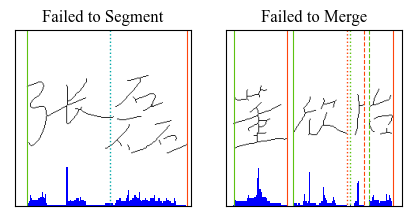

In [8]:
pic = 32

im = cv2.imread(f'./skel/1/{pic}.png', cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(5,2.5))

col = []
for j in range(im.shape[1]):
    pix = (1 - (im[:, j] // 255)).sum()
    col.append(pix)
col = np.array(col).astype(np.int32)
plt.subplot(121); plt.bar(range(len(col)), -col * 2, width=1, bottom=224,color= 'b')

if pic % 10 > 5:
    supposed = 3
else:
    supposed = 2

splits = []
start = 0
flag = False
for i in range(im.shape[1]):
    if col[i] > 0 and not flag:
        start = i
        flag = True
    elif col[i] == 0 and flag:
        splits.append((start, i))
        flag = False

actual = len(splits)
for i in range(0, actual - supposed):
    cnt = []
    for i, sp in enumerate(splits):
        cnt.append((np.sum(col[sp[0]:sp[1]]), i))
    cnt.sort(key = lambda x: x[0])

    idx = []
    pos = cnt[0][1]
    idx.append(pos)


    dis1 = 224
    dis2 = 224
    if pos - 1 >= 0:
        dis1 = splits[pos][0] - splits[pos - 1][1]
    if pos + 1 < len(splits):
        dis2 = splits[pos + 1][0] - splits[pos][1]
    if dis1 > dis2:
        splits[pos + 1] = (splits[pos][0], splits[pos + 1][1])
    else:
        splits[pos - 1] = (splits[pos - 1][0], splits[pos][1])
    
    for i in reversed(idx):
        splits.pop(i)

plt.imshow(im,cmap="gray")
for sp in splits:
    plt.plot((sp[0], sp[0]), (0, 224), c='#5DC211', linewidth=0.8)
    plt.plot((sp[1], sp[1]), (0, 224), c='#FF440B', linewidth=0.8)
plt.plot((120, 120), (0, 224), ':', c='#00A8A8', linewidth=1)

plt.ylim((224,0)); plt.yticks([]); plt.xticks([]); plt.title('Failed to Segment')

pic = 9

im = cv2.imread(f'./skel/1/{pic}.png', cv2.IMREAD_GRAYSCALE)

col = []
for j in range(im.shape[1]):
    pix = (1 - (im[:, j] // 255)).sum()
    col.append(pix)
col = np.array(col).astype(np.int32)
plt.subplot(122); plt.bar(range(len(col)), -col * 2, width=1, bottom=224,color= 'b')

if pic % 10 > 5:
    supposed = 3
else:
    supposed = 2

splits = []
start = 0
flag = False
for i in range(im.shape[1]):
    if col[i] > 0 and not flag:
        start = i
        flag = True
    elif col[i] == 0 and flag:
        splits.append((start, i))
        flag = False

actual = len(splits)
for i in range(0, actual - supposed):
    cnt = []
    for i, sp in enumerate(splits):
        cnt.append((np.sum(col[sp[0]:sp[1]]), i))
    cnt.sort(key = lambda x: x[0])

    idx = []
    pos = cnt[0][1]
    idx.append(pos)


    dis1 = 224
    dis2 = 224
    if pos - 1 >= 0:
        dis1 = splits[pos][0] - splits[pos - 1][1]
    if pos + 1 < len(splits):
        dis2 = splits[pos + 1][0] - splits[pos][1]
    if dis1 > dis2:
        splits[pos + 1] = (splits[pos][0], splits[pos + 1][1])
    else:
        splits[pos - 1] = (splits[pos - 1][0], splits[pos][1])
    
    for i in reversed(idx):
        splits.pop(i)

plt.imshow(im,cmap="gray")
plt.plot((splits[0][0], splits[0][0]), (0, 224), c='#5DC211', linewidth=0.8)
plt.plot((splits[0][1], splits[0][1]), (0, 224), c='#FF440B', linewidth=0.8)
plt.plot((splits[1][0], splits[1][0]), (0, 224),c='#5DC211', linewidth=0.8)
plt.plot((splits[1][1], splits[1][1]), (0, 224), '--', c='#FF440B', linewidth=0.8)
plt.plot((splits[2][0], splits[2][0]), (0, 224),'--', c='#5DC211', linewidth=0.8)
plt.plot((splits[2][1], splits[2][1]), (0, 224), c='#FF440B', linewidth=0.8)
plt.plot((153, 153), (0, 224), ':', c='#FF440B', linewidth=1)
plt.plot((157, 157), (0, 224), ':', c='#5DC211', linewidth=1)

plt.ylim((224,0)); plt.yticks([]); plt.xticks([]); plt.title('Failed to Merge')

fig.savefig('segment-2.pdf', bbox_inches='tight',pad_inches=0.0)


In [ ]:
fig = plt.figure(figsize=(10,8))

for pic in range(1, 41):
    im = cv2.imread(f'./prenn/1/{pic}.png', cv2.IMREAD_GRAYSCALE)

    col = []
    for j in range(im.shape[1]):
        pix = (1 - (im[:, j] // 255)).sum()
        col.append(pix)
    plt.subplot(5,8,pic); plt.bar(range(len(col)), col)

    if pic % 10 > 5:
        supposed = 3
    else:
        supposed = 2

    splits = []
    start = 0
    flag = False
    for i in range(im.shape[1]):
        if col[i] > 0 and not flag:
            start = i
            flag = True
        elif col[i] == 0 and flag:
            splits.append((start, i))
            flag = False     

    actual = len(splits)
    for i in range(0, actual - supposed):
        cnt = []
        for i, sp in enumerate(splits):
            cnt.append((np.sum(col[sp[0]:sp[1]]), i))
        cnt.sort(key = lambda x: x[0])

        idx = []
        pos = cnt[0][1]
        idx.append(pos)


        dis1 = 224
        dis2 = 224
        if pos - 1 >= 0:
            dis1 = splits[pos][0] - splits[pos - 1][1]
        if pos + 1 < len(splits):
            dis2 = splits[pos + 1][0] - splits[pos][1]
        if dis1 > dis2:
            splits[pos + 1] = (splits[pos][0], splits[pos + 1][1])
        else:
            splits[pos - 1] = (splits[pos - 1][0], splits[pos][1])

        for i in reversed(idx):
            splits.pop(i)

    plt.subplot(5,8,pic); plt.imshow(im,cmap="gray")
    for sp in splits:
        plt.plot((sp[0], sp[0]), (0, 224), c='b', linewidth=0.5)
        plt.plot((sp[1], sp[1]), (0, 224), c='r', linewidth=0.5)
    plt.xticks([])
    plt.yticks([])
fig.savefig('split.pdf')

In [1]:
rct_peri = []
rct_a = []

ang = [[],[],[],[]]
length = [[],[],[],[]]

for person in range(1, 94):
    print(f'{round((person - 1) / 93 * 100)}%', person)
    for pic in range(1, 41):
        im = cv2.imread(f'./skel/{person}/{pic}.png', cv2.IMREAD_GRAYSCALE)

        typ = (pic - 1) // 10
        cnt_y, cnt_x = np.nonzero(255 - im)
        cnt = np.dstack((cnt_y, cnt_x)).squeeze()
        rect = cv2.minAreaRect(np.array(cnt))
        box = cv2.boxPoints(rect)

        box_y = box[:, 0]
        box_x = box[:, 1]

        d0 = np.linalg.norm(box[0] - box[1])
        d1 = np.linalg.norm(box[1] - box[2])

        if d0 < d1:
            slope = -(box[1][0] - box[2][0]) / (box[1][1] - box[2][1])
        else:
            slope = -(box[1][0] - box[0][0]) / (box[1][1] - box[0][1])
        plt.show()
        ang[typ].append(np.arctan(slope)*180/np.pi)
        rct_peri.append(2 * (d0 + d1))
        rct_a.append(d0 * d1)

        length[typ].append(calc_length(im, cnt) / rct_peri[-1])

0% 1


NameError: name 'cv2' is not defined

In [11]:
pvalue = [[],[],[]]
for i in range(3):
    pvalue[i].append(ttest_rel(ang[0],ang[i+1]))
pvalue

[[Ttest_relResult(statistic=1.0190904428426688, pvalue=0.30842534600855004)],
 [Ttest_relResult(statistic=3.2223275876395148, pvalue=0.001315787751870343)],
 [Ttest_relResult(statistic=3.2246296053167587, pvalue=0.0013053716318814905)]]

In [12]:
pvalue = [[],[],[]]
for i in range(3):
    pvalue[i].append(ttest_rel(length[0],length[i+1]))
pvalue

[[Ttest_relResult(statistic=-15.693664727747326, pvalue=2.070895715888716e-49)],
 [Ttest_relResult(statistic=-8.976154499147878, pvalue=1.5248471814254838e-18)],
 [Ttest_relResult(statistic=-6.822994148336909, pvalue=1.6063043971199794e-11)]]

In [13]:
dists = [[],[],[],[]]

for person in range(1, 94):
    print(f'{round((person - 1) / 93 * 100)}%', person)
    for pic in range(1, 41):
        im = cv2.imread(f'./skel/{person}/{pic}.png', cv2.IMREAD_GRAYSCALE)

        col = []
        for j in range(im.shape[1]):
            pix = (1 - (im[:, j] // 255)).sum()
            col.append(pix)

        typ = (pic - 1) // 10
        if pic % 10 > 5:
            supposed = 3
        else:
            supposed = 2

        splits = []
        start = 0
        flag = False
        for i in range(im.shape[1]):
            if col[i] > 0 and not flag:
                start = i
                flag = True
            elif col[i] == 0 and flag:
                splits.append((start, i))
                flag = False     

        actual = len(splits)
        for i in range(0, actual - supposed):
            cnt = []
            for i, sp in enumerate(splits):
                cnt.append((np.sum(col[sp[0]:sp[1]]), i))
            cnt.sort(key = lambda x: x[0])

            idx = []
            pos = cnt[0][1]
            idx.append(pos)


            dis1 = 224
            dis2 = 224
            if pos - 1 >= 0:
                dis1 = splits[pos][0] - splits[pos - 1][1]
            if pos + 1 < len(splits):
                dis2 = splits[pos + 1][0] - splits[pos][1]
            if dis1 > dis2:
                splits[pos + 1] = (splits[pos][0], splits[pos + 1][1])
            else:
                splits[pos - 1] = (splits[pos - 1][0], splits[pos][1])

            for i in reversed(idx):
                splits.pop(i)

        acutal = len(splits)
        dist = []
        for _ in range(0, supposed - actual): dist.append(0)
        for i in range(len(splits) - 1):
            dist.append(splits[i + 1][0] - splits[i][1])
        dists[typ].append(np.array(dist).mean()/rct_peri[(person - 1) * 40 + pic - 1])

0% 1
1% 2
2% 3
3% 4
4% 5
5% 6
6% 7
8% 8
9% 9
10% 10
11% 11
12% 12
13% 13
14% 14
15% 15
16% 16
17% 17
18% 18
19% 19
20% 20
22% 21
23% 22
24% 23
25% 24
26% 25
27% 26
28% 27
29% 28
30% 29
31% 30
32% 31
33% 32
34% 33
35% 34
37% 35
38% 36
39% 37
40% 38
41% 39
42% 40
43% 41
44% 42
45% 43
46% 44
47% 45
48% 46
49% 47
51% 48
52% 49
53% 50
54% 51
55% 52
56% 53
57% 54
58% 55
59% 56
60% 57
61% 58
62% 59
63% 60
65% 61
66% 62
67% 63
68% 64
69% 65
70% 66
71% 67
72% 68
73% 69
74% 70
75% 71
76% 72
77% 73
78% 74
80% 75
81% 76
82% 77
83% 78
84% 79
85% 80
86% 81
87% 82
88% 83
89% 84
90% 85
91% 86
92% 87
94% 88
95% 89
96% 90
97% 91
98% 92
99% 93


In [14]:
pvalue = [[],[],[]]
for i in range(3):
    pvalue[i].append(ttest_rel(dists[0],dists[i+1]))
pvalue

[[Ttest_relResult(statistic=5.270220050992576, pvalue=1.6946507908517518e-07)],
 [Ttest_relResult(statistic=20.736289906122003, pvalue=8.520886422566588e-79)],
 [Ttest_relResult(statistic=18.188178744165427, pvalue=1.8134508510946757e-63)]]

In [16]:
# Save data
with open('angle.dat', 'w') as f:
    json.dump(ang, f)
with open('length.dat', 'w') as f:
    json.dump(length, f)
with open('dist.dat', 'w') as f:
    json.dump(dists, f)